<h1>Assignment 3: Machine Learning Fashionista</h1>
<h2>Dimensionality Reduction: PCA vs LDA</h2>

In this assignment, we compare the results of using PCA, LDA, or neither when training a Logistic Regression classifier on a dataset of pictures of Jerseys, Shirts, Men’s clothing and Women’s clothing downloaded from ImageNet.

<h3>Instructions:</h3>

1) Split your dataset from the PCA pre-class work into 80% training data and 20% testing data.

2) Build a simple linear classifier using the original pixel data. There are several options that you can try:
- linear SVC (http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#examples-using-sklearn-svm-linearsvc)
- logistic classifier (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#examples-using-sklearn-linear-model-logisticregression) 

What is your error rate on the training data? What is your error rate on your testing data?

3) Train the same linear model as in question 1, but now on the reduced representation that you created using PCA. What is your error rate on the training data? What is your error rate on your testing data?

4) Train the same linear model as in question 1, but now on the reduced representation that you created using LDA. What is your error rate on the training data? What is your error rate on your testing data?

5) Write three paragraphs, describing and interpreting your results from questions 1, 2, and 3. Make a recommendation on which classifier you would prefer, and why.

<h2>Cleaning and Processing Data</h2>

<h3>Manual Cleaning of the men and women clothing data</h3>

I manually filtered and sorted the men and women clothing data by removing/cropping:
- pictures with more than one person or one clothing item.
- pictures where more than 50% of the shirt is hidden.
- miscategorized pictures.
- pictures of folded clothing items.


In [ ]:
#import libraries
import collections
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread_collection
from skimage.transform import resize
import seaborn as sns
sns.set()

#my path 
men_dir = 'men_clothing/*.JPEG'
women_dir = 'women_clothing/*.JPEG'

#creating a collection with the available images
men = imread_collection(men_dir)
women = imread_collection(women_dir)

print(f"Number of men clothing pictures: {len(men)}.")
print(f"Number of women clothing pictures: {len(women)}.")

In [2]:
#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import classification_report

<h3>Resizing, Reshaping and Balancing</h3>

I resized all the pictures to have same dimension of height and width of 250, 200. I then flattened the 3 dimensions of height, width, and RGB channels of each image into an array of pixels to input into the logistic regression classifier. Since the size of the women dataset is greater than the men's dataset (944 vs 698), I trained two LogisticRegressionCV models:

1) One on the original unbalanced set, where I set the class_weight parameter to 'balanced' to automatically weigh classes inversely proportional to their frequency.

2) The second on a manually trimmed and balanced women and men dataset (both containing 698 data points).

I then observed which model provided better training and cross-validation results (cross-validation for C-value is inbuilt into the LogisticRegressionCV function) and chose to subsequently train the reduced-dimensionality methods (PCA & LDA) on the training set that provided lower error rates.

Text(0,0.5,'Women Resized')

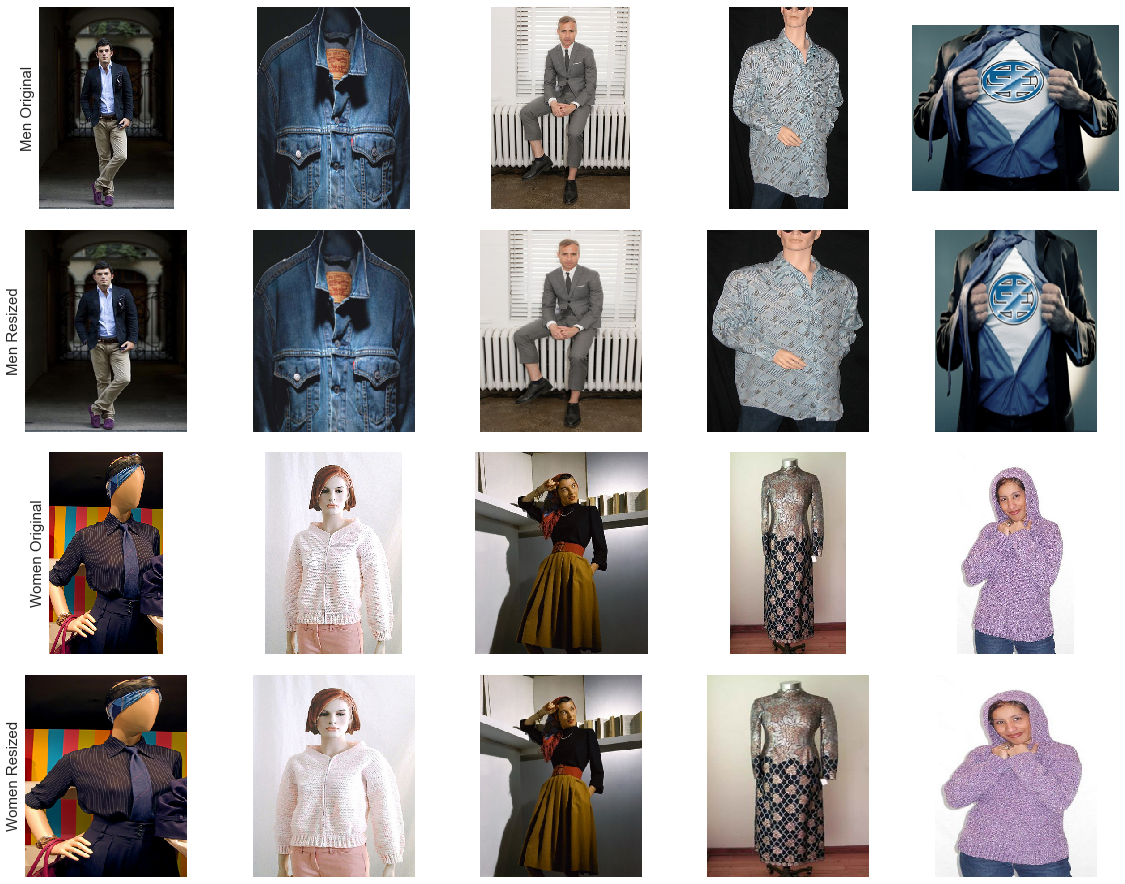

In [3]:
#height and width of resized image
new_height = 250
new_width = 200
    
#resize images in dataset
men_resized = [resize(men[i],(new_height,new_width), mode='constant') for i in range(len(men))]
women_resized = [resize(women[i],(new_height,new_width), mode='constant') for i in range(len(women))]

#peak at the resized images vs original images
fig, ax = plt.subplots(4, 5, figsize=(20, 16),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):
    ax[0, i].imshow(men[i])
    ax[1, i].imshow(men_resized[i])
    ax[2, i].imshow(women[i])
    ax[3, i].imshow(women_resized[i])
    
ax[0, 0].set_ylabel('Men Original',size=15)
ax[1, 0].set_ylabel('Men Resized',size=15)
ax[2, 0].set_ylabel('Women Original',size=15)
ax[3, 0].set_ylabel('Women Resized',size=15)

In [4]:
#Reshape images to flattened array
men_arr = np.array([i.flatten() for i in men_resized])
#original women array size
og_women_arr = np.array([i.flatten() for i in women_resized])

print('Original length men data:',men_arr.shape)
print('Original length women data:',og_women_arr.shape)


Original length men data: (698, 150000)
Original length women data: (944, 150000)


In [5]:
#create labels for men and women data. 1 is for men, 0 is for women.
men_label = np.ones(len(men_arr))
og_women_label = np.zeros(len(og_women_arr))

#join the men and women clothing data together.
og_X = np.concatenate((men_arr, og_women_arr), axis=0)
og_y = np.concatenate((men_label, og_women_label), axis=0)

#split the data with 0.2 test size.
og_X_train,og_X_test,og_y_train,og_y_test = train_test_split(og_X, og_y, test_size=0.2, stratify = og_y)

print('Original length training and testing dataset shapes:')
print(og_X_train.shape,og_y_train.shape,og_X_test.shape,og_y_test.shape)

print("\nNumber of 0's (women clothing) and 1's (men clothing) in train and test set:")
print("Train: ",collections.Counter(og_y_train))
print("Test: ",collections.Counter(og_y_test))

Original length training and testing dataset shapes:
(1313, 150000) (1313,) (329, 150000) (329,)

Number of 0's (women clothing) and 1's (men clothing) in train and test set:
Train:  Counter({0.0: 755, 1.0: 558})
Test:  Counter({0.0: 189, 1.0: 140})


In [6]:
#balanced women array - same dimensions as men array
women_arr = og_women_arr[:len(men)]
women_label = np.zeros(len(women_arr))
print('Balanced shapes for men and women data:',men_arr.shape,women_arr.shape)

#join the men and women clothing data together.
X = np.concatenate((men_arr, women_arr), axis=0)
y = np.concatenate((men_label, women_label), axis=0)

#split the data with 0.2 test size.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify = y)

print('Trimmed & balanced length training and testing dataset shapes:')
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

print("\nNumber of 0's (women clothing) and 1's (men clothing) in train and test set:")
print("Train: ",collections.Counter(y_train))
print("Test: ",collections.Counter(y_test))

Balanced shapes for men and women data: (698, 150000) (698, 150000)
Trimmed & balanced length training and testing dataset shapes:
(1116, 150000) (1116,) (280, 150000) (280,)

Number of 0's (women clothing) and 1's (men clothing) in train and test set:
Train:  Counter({0.0: 558, 1.0: 558})
Test:  Counter({0.0: 140, 1.0: 140})


<h2>Model Training and Evaluation</h2>

<h3>Logistic Regression Classifier on Original 150000-dimension dataset</h3>

A comparison is made between the training results obtained from the LogisticRegressionCV function trained on the manually trimmed and balanced dataset vs the unbalanced dataset that was weighted using the class_weight='balanced' option.

In [7]:
#applying class_weight='balanced' on original, unbalanced dataset.
og_logr_mod = LogisticRegressionCV(Cs=10, class_weight='balanced').fit(og_X_train, og_y_train)


In [11]:
print(f'Using class_weight="balanced" on original unbalanced dataset:')
print(f'Logistic Regression CV results using default lbfgs solver, optimizing for different Cs.\n')
print(f'Array of C used for cross-validation: \n{og_logr_mod.Cs_}\n')
print(f'Array of C that maps to the best scores across every class: \n{og_logr_mod.C_}\n')
print(f'Mean cross-validation accuracy score: \n{np.mean(og_logr_mod.scores_[1])}\n')
print(f'Classification report:\n{classification_report(og_y_train, og_logr_mod.predict(og_X_train))}')
print(f'Accuracy: {og_logr_mod.score(og_X_train,og_y_train)}')

Using class_weight="balanced" on original unbalanced dataset:
Logistic Regression CV results using default lbfgs solver, optimizing for different Cs.

Array of C used for cross-validation: 
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]

Array of C that maps to the best scores across every class: 
[0.00077426]

Mean cross-validation accuracy score: 
0.6660364182244373

Classification report:
             precision    recall  f1-score   support

        0.0       0.91      0.91      0.91       755
        1.0       0.88      0.87      0.88       558

avg / total       0.89      0.89      0.89      1313

Accuracy: 0.8941355674028941


In [13]:
#Logistic regression on trimmed & balanced dataset, cross-validating for C-value.
logr_mod = LogisticRegressionCV(Cs=10).fit(X_train, y_train)


In [14]:
print(f'Training on manually trimmed and balanced dataset:')
print(f'Logistic Regression CV results using default lbfgs solver, optimizing for different Cs.\n')
print(f'Array of C used for cross-validation: \n{logr_mod.Cs_}\n')
print(f'Array of C that maps to the best scores across every class: \n{logr_mod.C_}\n')
print(f'Mean cross-validation accuracy score: \n{np.mean(logr_mod.scores_[1])}\n')
print(f'Classification report:\n{classification_report(y_train, logr_mod.predict(X_train))}')
print(f'Accuracy: {logr_mod.score(X_train,y_train)}')

Training on manually trimmed and balanced dataset:
Logistic Regression CV results using default lbfgs solver, optimizing for different Cs.

Array of C used for cross-validation: 
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]

Array of C that maps to the best scores across every class: 
[0.0001]

Mean cross-validation accuracy score: 
0.6661290322580644

Classification report:
             precision    recall  f1-score   support

        0.0       0.76      0.82      0.79       558
        1.0       0.81      0.74      0.77       558

avg / total       0.78      0.78      0.78      1116

Accuracy: 0.782258064516129


<h3>Choosing the original dataset</h3>

Since the original dataset with the LogisticRegressionCV's class_weight='balanced' parameter provides better training results (0.89 accuracy vs 0.78 of the manually trimmed dataset), the same settings will be used for the PCA and LDA dimensionality reduction training procedures below. 

The test results of the LogisticRegressionCV with balanced class-weights on the original pixel dataset are as follows:

In [16]:
#Performance of cv-ed logistic regression model on test set
og_y_pred = og_logr_mod.predict(og_X_test)
print("Logistic Regression Model Performance on Original Test Set (balanced with class_weight)\n")
print(f"Accuracy score: {og_logr_mod.score(og_X_test,og_y_test)}\n")
print(f"Classification report: \n{classification_report(og_y_test, og_y_pred)}")

Logistic Regression Model Performance on Original Test Set (balanced with class_weight)

Accuracy score: 0.756838905775076

Classification report: 
             precision    recall  f1-score   support

        0.0       0.77      0.81      0.79       189
        1.0       0.73      0.68      0.70       140

avg / total       0.76      0.76      0.76       329



<h3>PCA Dimensionality Reduction</h3>

In [21]:
#Use randomized svd_solver to approx first N Principle Components much quicker than standard PCA
#useful for high-dimensional data
pca = PCA(n_components = 200, svd_solver='randomized').fit(og_X_train, og_y_train)
pca_components_train = pca.transform(og_X_train)  
print("original shape:   ", og_X_train.shape)
print("transformed shape:", pca_components_train.shape)


original shape:    (1313, 150000)
transformed shape: (1313, 200)


Text(0,0.5,'cumulative explained variance')

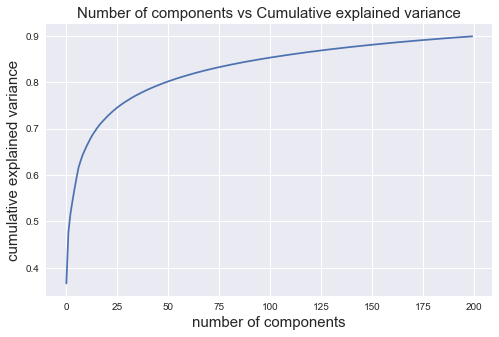

In [22]:
#plot cumulative explained variance across number of components
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Number of components vs Cumulative explained variance',size=15)
plt.xlabel('number of components',size=15)
plt.ylabel('cumulative explained variance',size=15)

Since 200 components provides about 90% of the explained variance, we will accept the trained PCA model of 200 components.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0,0.5,'200-dim\nreconstruction')

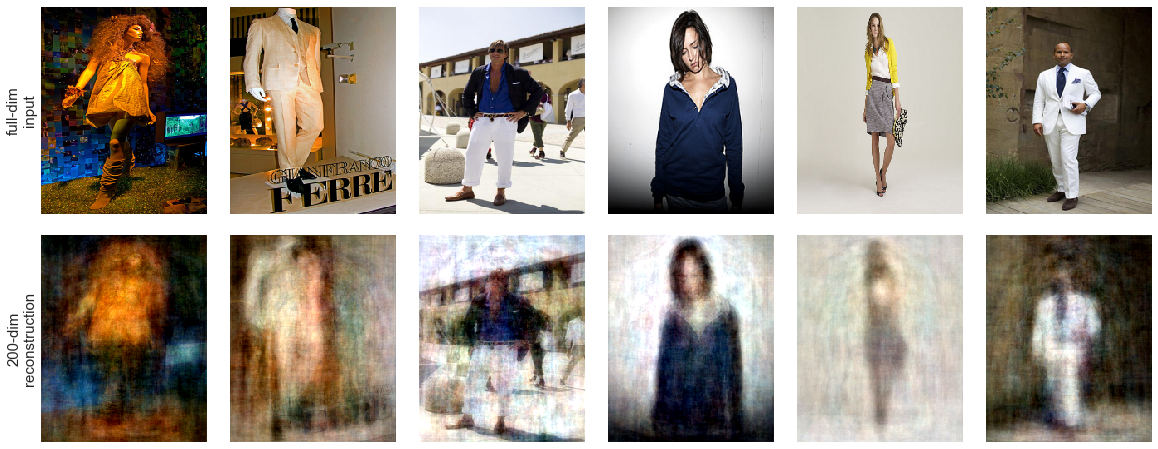

In [20]:
#compare input images with images reconstructed from 200 components
pca_projected = pca.inverse_transform(pca_components_train)

# Plot the results
fig, ax = plt.subplots(2, 6, figsize=(20, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(6):
    ax[0, i].imshow(og_X_train[i].reshape(new_height,new_width,3))
    ax[1, i].imshow(pca_projected[i].reshape(new_height,new_width,3))
    
ax[0, 0].set_ylabel('full-dim\ninput',size=15)
ax[1, 0].set_ylabel('200-dim\nreconstruction',size=15)


In [34]:
#Cross-validation to find best C-value for logistic regression classifier
pca_logr_mod = LogisticRegressionCV(Cs=10, class_weight='balanced').fit(pca_components_train,og_y_train)

print(f'Logistic Regression CV results using default of lbfgs solver, optimizing for different Cs.\n')
print(f'Array of C used for cross-validation: \n{pca_logr_mod.Cs_}\n')
print(f'Array of C that maps to the best scores across every class: \n{pca_logr_mod.C_}\n')
print(f'Mean cross-validation accuracy score: \n{np.mean(pca_logr_mod.scores_[1])}\n')
print(f'Classification report:\n{classification_report(og_y_train, pca_logr_mod.predict(pca_components_train))}')
print(f'Accuracy: {pca_logr_mod.score(pca_components_train,og_y_train)}')



Logistic Regression CV results using default of lbfgs solver, optimizing for different Cs.

Array of C used for cross-validation: 
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]

Array of C that maps to the best scores across every class: 
[0.00077426]

Mean cross-validation accuracy score: 
0.647229275292659

Classification report:
             precision    recall  f1-score   support

        0.0       0.79      0.79      0.79       755
        1.0       0.71      0.72      0.71       558

avg / total       0.76      0.76      0.76      1313

Accuracy: 0.7570449352627571


In [33]:
#Performance of cv-ed logistic regression model on test set
pca_components_test = pca.transform(og_X_test)

pca_y_pred = pca_logr_mod.predict(pca_components_test)

print("Logistic Regression Model Performance on PCA Reduced-Dimensionality (n_components=200) Set\n")
print(f"Accuracy score: {pca_logr_mod.score(pca_components_test,og_y_test)}\n")
print(f"Classification report: \n{classification_report(og_y_test, pca_y_pred)}")


Logistic Regression Model Performance on PCA Reduced-Dimensionality (n_components=200) Set

Accuracy score: 0.756838905775076

Classification report: 
             precision    recall  f1-score   support

        0.0       0.78      0.80      0.79       189
        1.0       0.72      0.70      0.71       140

avg / total       0.76      0.76      0.76       329



<h3>LDA Dimensionality Reduction</h3>

Since there are only 2 classes, i.e. men's clothing and women's clothing, the number of components has to be 1 since sklearn's LDA function can only produce at most k - 1 components (where k is the number of classes).

In [24]:
lda = LDA(n_components=1).fit(og_X_train, og_y_train)
lda_X_train = lda.transform(og_X_train) 
print("original shape:   ", og_X_train.shape)
print("transformed shape:", lda_X_train.shape)
    

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


original shape:    (1313, 150000)
transformed shape: (1313, 1)


The "Variables are collinear" warning indicates that the estimated coefficients from the LDA transformation could be collinear. However, since we are more concerned on the classification performance of the LDA rather than the interpretability of the estimated coefficients, the warning will be ignored for now.

In [25]:
#explained variance ratio for lda is 1 since there's only 1 component
print(lda.explained_variance_ratio_)


[1.]


In [30]:
#Cross-validation to find best C-value for logistic regression classifier
lda_logr_mod = LogisticRegressionCV(Cs=10, class_weight='balanced').fit(lda_X_train,og_y_train)

print(f'Logistic Regression CV results using default of lbfgs solver, optimizing for different Cs.\n')
print(f'Array of C used for cross-validation: \n{lda_logr_mod.Cs_}\n')
print(f'Array of C that maps to the best scores across every class: \n{lda_logr_mod.C_}\n')
print(f'Mean accuracy score: \n{np.mean(lda_logr_mod.scores_[1])}\n')
print(f'Classification report:\n{classification_report(og_y_train, lda_logr_mod.predict(lda_X_train))}')
print(f'Accuracy: {lda_logr_mod.score(lda_X_train,og_y_train)}')



Logistic Regression CV results using default of lbfgs solver, optimizing for different Cs.

Array of C used for cross-validation: 
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]

Array of C that maps to the best scores across every class: 
[0.00599484]

Mean accuracy score: 
0.916383324799989

Classification report:
             precision    recall  f1-score   support

        0.0       0.93      0.92      0.93       755
        1.0       0.89      0.91      0.90       558

avg / total       0.92      0.92      0.92      1313

Accuracy: 0.916984006092917


In [31]:
#Performance of cv-ed logistic regression model on test set
lda_X_test = lda.transform(og_X_test)

lda_y_pred = lda_logr_mod.predict(lda_X_test)

print("Logistic Regression Model Performance on LDA Reduced-Dimensionality (n_components=1) Set\n")
print(f"Accuracy score: {lda_logr_mod.score(lda_X_test,og_y_test)}\n")
print(f"Classification report: \n{classification_report(og_y_test, lda_y_pred)}")


Logistic Regression Model Performance on LDA Reduced-Dimensionality (n_components=1) Set

Accuracy score: 0.7051671732522796

Classification report: 
             precision    recall  f1-score   support

        0.0       0.74      0.75      0.74       189
        1.0       0.65      0.65      0.65       140

avg / total       0.70      0.71      0.71       329



<h2>Summary</h2>

<h3>Results</h3>

The original dataset shapes of ( 698, 150000 ) for men and ( 944, 150000 ) for women were split into a train-test ratio of 0.8/0.2. In comparing the performance of a logistic regression classifier without balanced class weights on a manually trimmed and balanced dataset, vs a logistic regression classifier with balanced class weights on the original unbalanced dataset, the latter had a better training performance (accuracy of 0.89  vs 0.78 of the manually balanced dataset), and so I chose to use the original dataset for the PCA and LDA logistic regression methods as well, while setting class_weights='balanced' for both.

The LogisticRegressionCV function has inbuilt C-value cross-validation capabilities. 

Three different logistic regression models were trained and tested on either the original pixel dataset, the PCA dataset, or the LDA dataset. The training and testing results are shown below (the precision and recall details can be seen above, but will be ommited in this summary since the main point is to compare the general performance of the various models):

1) The original pixel dataset (150000 dimensions)
- Training accuracy: 0.89
- Testing accuracy: 0.76

2) The PCA dataset (200 dimensions)
- Training accuracy: 0.76
- Testing accuracy: 0.76

3) The LDA dataset (1 dimension)
- Training accuracy: 0.92
- Testing accuracy: 0.71

<h3>Interpretation of Results</h3>

The results above reveal that while the models trained on the original dataset and LDA dataset have higher training accuracy scores, the LDA dataset model has a lower testing accuracy than the PCA dataset model (0.71 vs 0.76), while the original pixel dataset has the same testing accuracy (0.76). 

The higher training scores for both the original and LDA dataset models could be a result of overfitting. In the case of the original pixel dataset, the large amount of features (150000) could be generating a lot of unneccesary noise that interferes with the model's classification performance on the testing set. The LDA dataset has a reduced dimension of 1 component, and its model may be underperforming on the test set due to a lack of differentiability between the two classes when only 1 linear discriminant is derived.

The model trained on the PCA dataset has a roughly equivalent training and testing score; this suggests that the model does a better job at classifying new and unseen data. While one would typically expect the LDA to have a higher performance since the LDA reduction is a supervised method that prioritizes class separability, perhaps the LDA is underperforming due to the extreme reduced dimensionality of 1, which may not be sufficient to account for the differences between the men and women clothing class.

Efficiency-wise, the original dataset model takes the longest to run - at least a few minutes (not more than 10) - vs the reduced-dimensionality models, which only take a few seconds to run on both the training and testing set. This makes sense since the original dataset has 150000 dimensions vs 200-D for the PCA dataset and 1-D for the LDA dataset. The PCA and LDA models do require an additional preprocessing step of transforming the data to its reduced-dimensionality version beforehand, which takes a few minutes (not more than 5). 

When one considers the process of rigorous cross-validation, the PCA and LDA dataset models are much more efficient since the transformation step only has to be performed once on the entire dataset, after which the cross-validation process can be conducted quickly and efficiently on the transformed data; whereas for the original dataset, the cross-validation would take much longer since every parameter-adjustment would result in training the model on a 150000 feature dataset again.

<h3>Recommendation</h3>

Considering the training and test results, and the efficiency of the various methods, I would recommend using the PCA dataset model. Although it has a similar testing accuracy as the original dataset model, the dataset is more compact (200-D vs 150000-D) and so any cross-validation, training, and testing processes would be much more efficient. Furthermore, the similar performance between the training and testing set shows that the PCA model has a more reliable performance on new and unseen data vs the original dataset model.